# Running Exercises

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.5.1     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.1     ✔ stringr 1.5.1
✔ readr   2.1.5     ✔ forcats 1.0.0
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
library(ggthemes)

In [2]:
students <- read_csv("https://pos.it/r4ds-students-csv")

Rows: 6 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Full Name, favourite.food, mealPlan, AGE
dbl (1): Student ID

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
students

Student ID,Full Name,favourite.food,mealPlan,AGE
<dbl>,<chr>,<chr>,<chr>,<chr>
1,Sunil Huffmann,Strawberry yoghurt,Lunch only,4
2,Barclay Lynn,French fries,Lunch only,5
3,Jayendra Lyne,N/A,Breakfast and lunch,7
4,Leon Rossini,Anchovies,Lunch only,NA
5,Chidiegwu Dunkel,Pizza,Breakfast and lunch,five
6,Güvenç Attila,Ice cream,Lunch only,6


# Homework Assignments

## 7.2.4 Exercises

1. What function would you use to read a file where fields were separated with “|”?

Answer: I could use read_delim() and try to specify '|' as the delimiter.

2. Apart from file, skip, and comment, what other arguments do read_csv() and read_tsv() have in common?

Answer: They also both have ```col_names = TRUE``` as the default value. ```guess_max = min(1000, n_max)``` is the same for both of them also. And ```show_col_types = should_show_types()``` is the same for both.

3. What are the most important arguments to read_fwf()?

Answer: ```file```, ```col_positions = fwf_empty(file, skip, n = guess_max)```, and ```guess_max = min(n_max, 1000)``` are some of the most important.

4. Sometimes strings in a CSV file contain commas. To prevent them from causing problems, they need to be surrounded by a quoting character, like " or '. By default, read_csv() assumes that the quoting character will be ". To read the following text into a data frame, what argument to read_csv() do you need to specify?
```r
"x,y\n1,'a,b'"
```

Answer: I would specify in the quote = """ argument that quote can also be quote = "'" to allow for the quoting character to be recognized to allow for commas to not cause issues.

5. Identify what is wrong with each of the following inline CSV files. What happens when you run the code?
```r
read_csv("a,b\n1,2,3\n4,5,6")
read_csv("a,b,c\n1,2\n1,2,3,4")
read_csv("a,b\n\"1")
read_csv("a,b\n1,2\na,b")
read_csv("a;b\n1;3")
```

In [4]:
read_csv("a,b\n1,2,3\n4,5,6")

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 2 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (1): a
num (1): b

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b
<dbl>,<dbl>
1,23
4,56


Answer: It's because there's only 2 columns specified (a and b) and there are three observations listed for each column - meaning that the second two numbers in each row are combined together.

In [5]:
read_csv("a,b,c\n1,2\n1,2,3,4")

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 2 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): a, b
num (1): c

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b,c
<dbl>,<dbl>,<dbl>
1,2,NA
1,2,34


Answer: There are now three columns specified but in the first set of numbers in the first row, there's only two observations recorded - meaning column 'C' doesn't have any value associated with it (causing teh NA value to appear).

In [6]:
read_csv("a,b\n\"1")

Rows: 0 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): a, b

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b
<chr>,<chr>


Answer: There is an extra '\' after the first line break as well as an extra set of ". This causes the 1 to not be treated as an observation in a new row.

In [7]:
read_csv("a,b\n1,2\na,b")

Rows: 2 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): a, b

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b
<chr>,<chr>
1,2
a,b


Answer: The first part is correct with establishing a and b as the columns and then on a new line 1 and 2 as the observations. However, adding back the a,b makes the table not have any rows associated with it. The spec_tbl_df: 2 x means there's 2 columns and no rows.

In [8]:
read_csv("a;b\n1;3")

Rows: 1 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): a;b

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


a;b
<chr>
1;3


Answer: The delimiter is ',' in read_csv(). To fix this, using read_csv2() would allow ';' to be the delimiter.

6. Practice referring to non-syntactic names in the following data frame by:
- Extracting the variable called 1.
- Plotting a scatterplot of 1 vs. 2.
- Creating a new column called 3, which is 2 divided by 1.
- Renaming the columns to one, two, and three.
```r
annoying <- tibble(
  `1` = 1:10,
  `2` = `1` * 2 + rnorm(length(`1`))
)
```

In [26]:
annoying <- tibble(
    `1` = 1:10,
    `2` = `1` * 2  + rnorm(length('1'))
)

In [27]:
annoying

1,2
<int>,<dbl>
1,2.870645
2,4.870645
3,6.870645
4,8.870645
5,10.870645
6,12.870645
7,14.870645
8,16.870645
9,18.870645


- Extracting the variable called 1:

In [28]:
annoying |>
    select(`1`)

1
<int>
1
2
3
4
5
6
7
8
9


- Plotting a scatterplot of 1 vs. 2

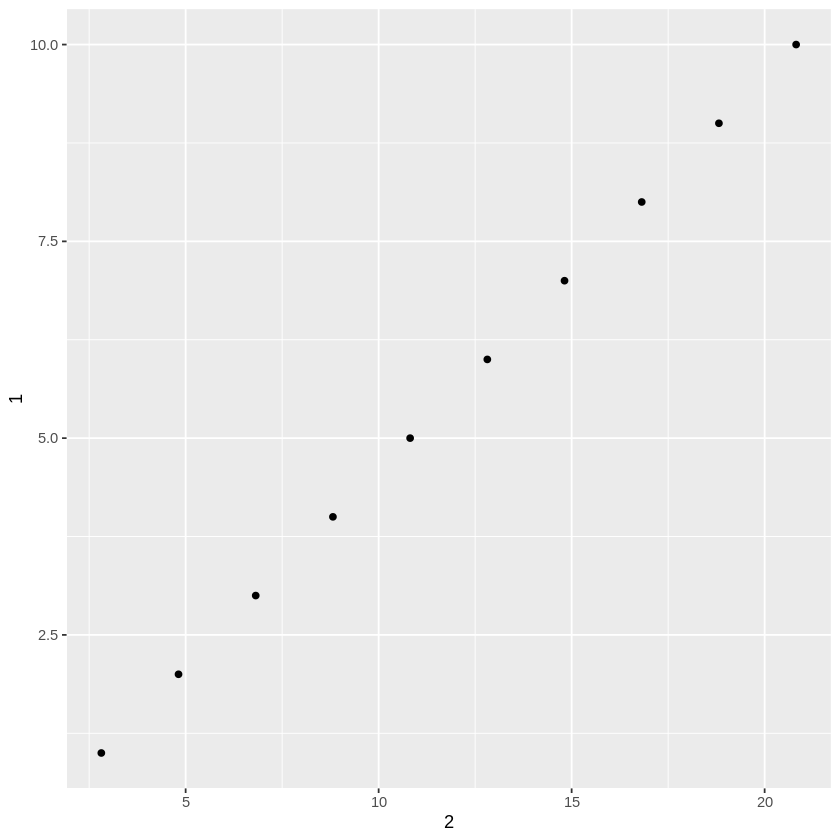

In [7]:
ggplot(annoying, aes(x = `2`, y = `1`)) +
    geom_point()

- Creating a new column called 3, which is 2 divided by 1

In [32]:
annoying <- annoying |>
    mutate(
        `3` = `2` / `1`
    )
annoying

1,2,3
<int>,<dbl>,<dbl>
1,2.870645,2.870645
2,4.870645,2.435323
3,6.870645,2.290215
4,8.870645,2.217661
5,10.870645,2.174129
6,12.870645,2.145108
7,14.870645,2.124378
8,16.870645,2.108831
9,18.870645,2.096738


- Renaming the columns to one, two, and three

In [33]:
annoying |>
    rename(
        one = '1',
        two = '2',
        three = '3'
    )

one,two,three
<int>,<dbl>,<dbl>
1,2.870645,2.870645
2,4.870645,2.435323
3,6.870645,2.290215
4,8.870645,2.217661
5,10.870645,2.174129
6,12.870645,2.145108
7,14.870645,2.124378
8,16.870645,2.108831
9,18.870645,2.096738
